In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn import preprocessing
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
test_tmp = pd.read_csv("C:/Users/Pooja/Desktop/data science/assignments/Support Vector Machines/SalaryData_Test(1).csv")
train_tmp = pd.read_csv("C:/Users/Pooja/Desktop/data science/assignments/Support Vector Machines/SalaryData_Train(1).csv")

In [3]:
df_tmp = test_tmp.append(train_tmp)

In [4]:
test = test_tmp.copy()
train = train_tmp.copy()

In [5]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
le=LabelEncoder()
columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']
for i in columns:
    train[i]=le.fit_transform(train[i])
    test[i]=le.fit_transform(test[i])    

In [8]:
binary = LabelBinarizer()
train["Salary"] = binary.fit_transform(train["Salary"])
test['Salary'] = binary.fit_transform(test["Salary"])

In [9]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [10]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [11]:
df = train.append(test) 
df1 = df.copy()
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [12]:
df1.shape

(45221, 14)

In [13]:
df1.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,2.204507,10.313217,10.118463,2.585148,5.969572,1.412684,3.680281,0.675062,1101.454700,88.548617,40.938038,35.431503,0.247849
std,13.217981,0.958132,3.816992,2.552909,1.500460,4.026444,1.597242,0.832361,0.468357,7506.511295,404.838249,12.007640,5.931380,0.431769
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,0.000000
50%,37.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,0.000000
75%,47.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,0.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000,1.000000


In [14]:
df1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

<AxesSubplot:>

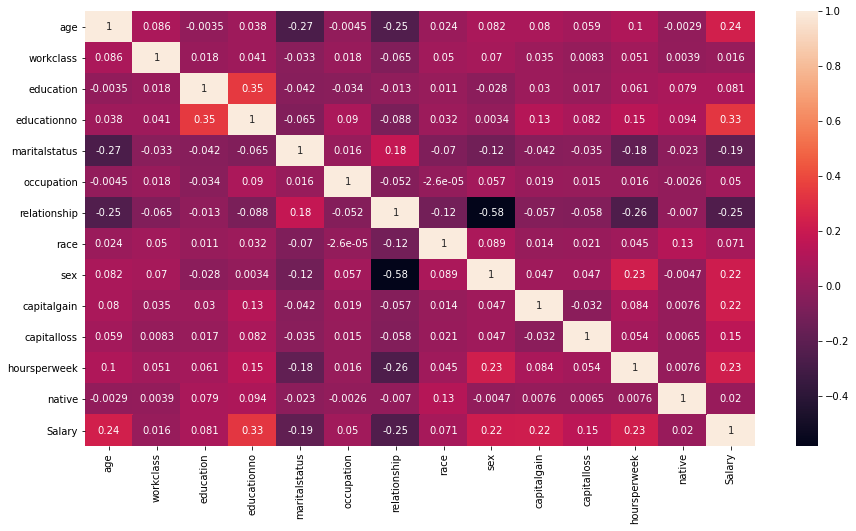

In [15]:
# Finding Correlation
corr = df1.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)

Skew: -0.31062061074424
Kurtosis: 0.6350448194491634


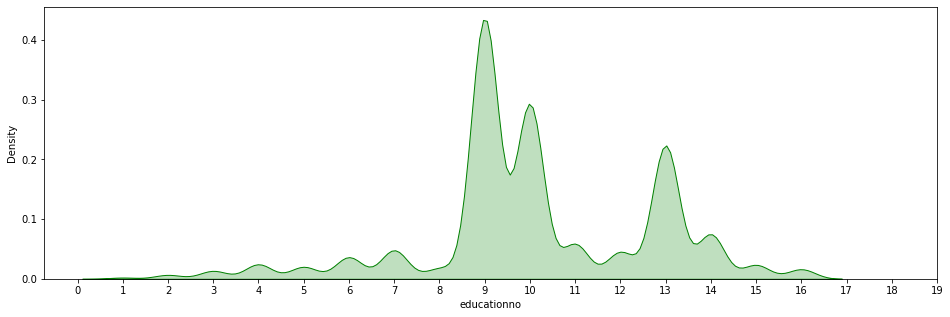

In [16]:
plt.rcParams["figure.figsize"] = 9,5
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['educationno'].skew()))
print("Kurtosis: {}".format(df1['educationno'].kurtosis()))
ax = sns.kdeplot(df1['educationno'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

In [ ]:
# The Data is negatively skewed and has low kurtosis value. Most of people have eduction Number of years of education 9 - 10

<ipython-input-17-e06cee192af2>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,i)


ValueError: num must be 1 <= num <= 4, not 5

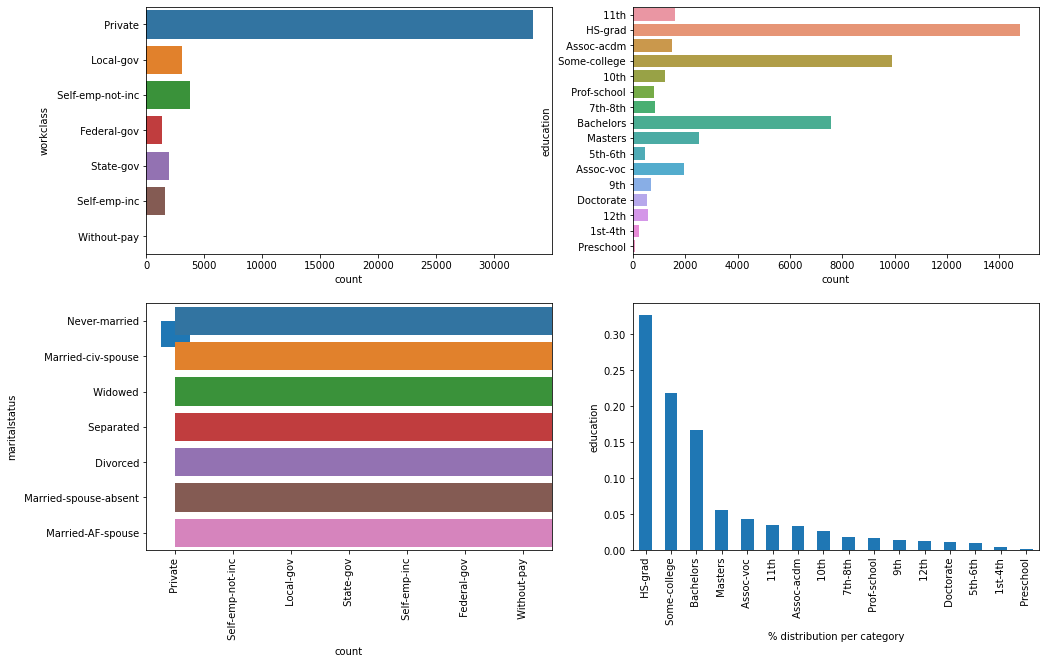

In [17]:
dfa = df_tmp[df_tmp.columns[0:13]]
obj_colum = dfa.select_dtypes(include='object').columns.tolist()
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    df_tmp[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

In [ ]:
# Majority of the workclass is in Private Sector. Also for education mojority of the people have HS graduation or some college degree

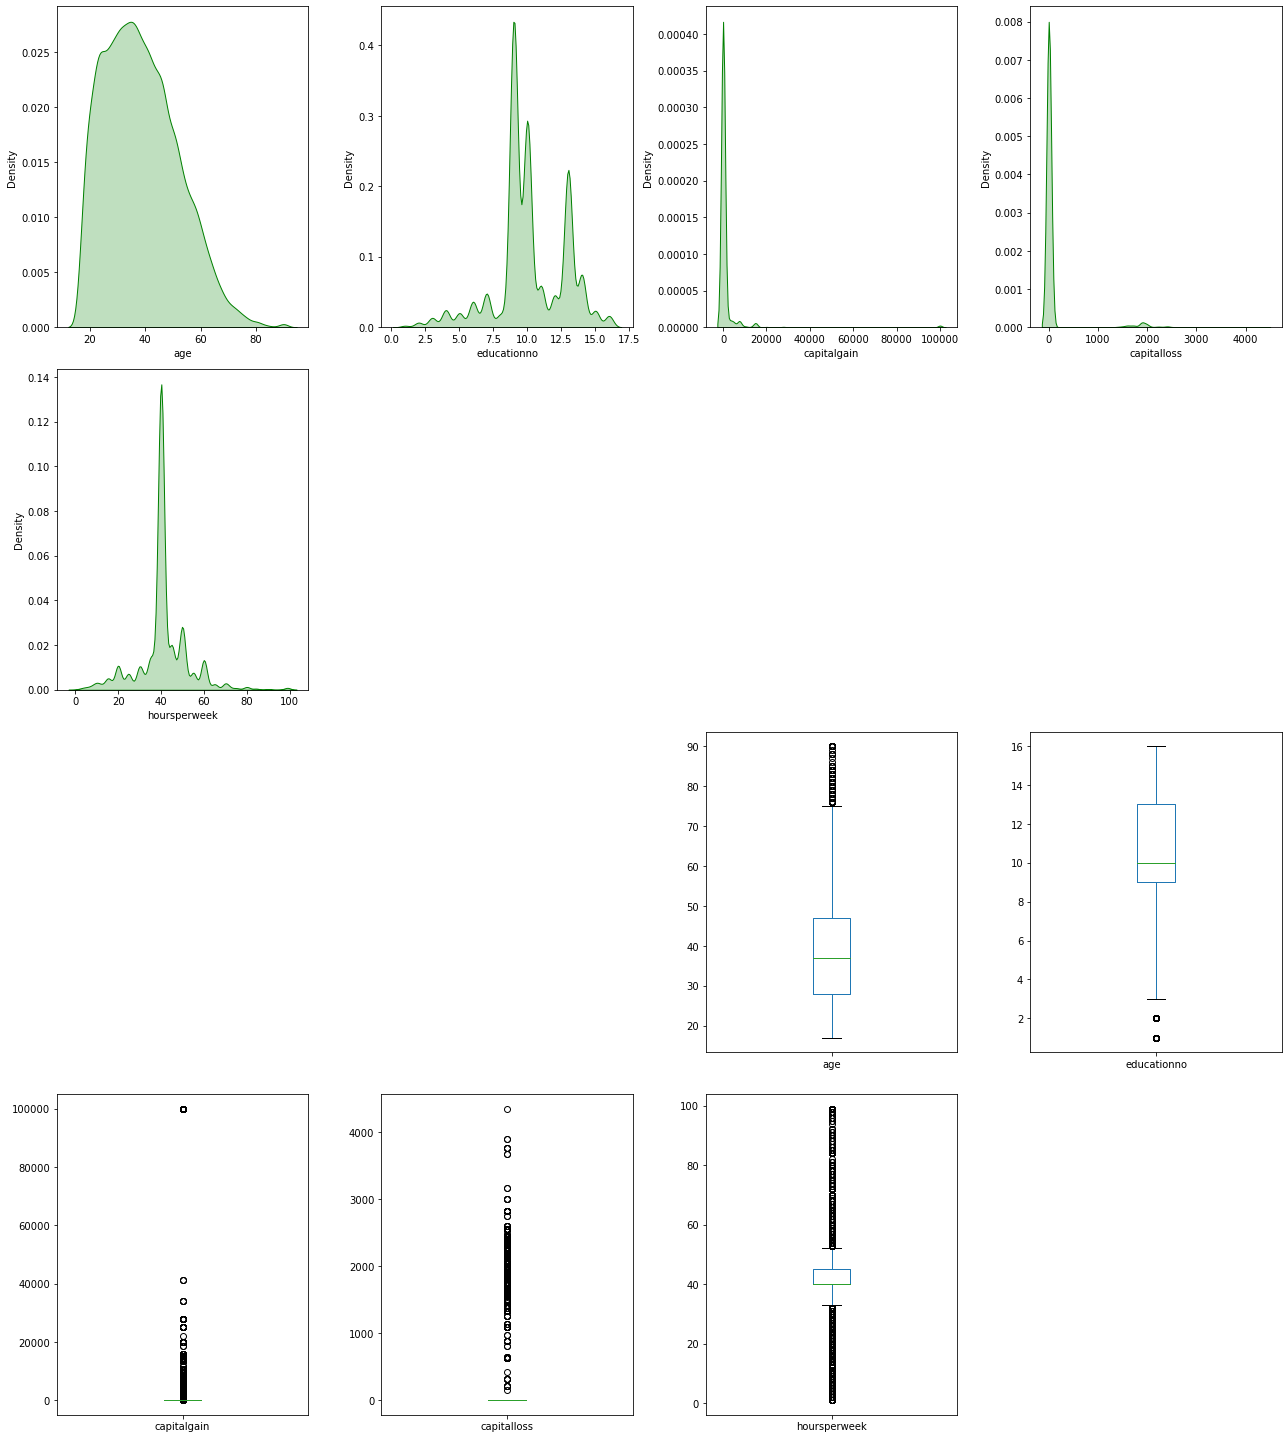

,age,educationno,capitalgain,capitalloss,hoursperweek
skewness,0.532784,-0.310621,11.788871,4.517536,0.340536
kurtosis,-0.155931,0.635045,150.147899,19.376085,3.201287


In [18]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [19]:
# SVM
col = df1.columns
x_train = train[col[0:13]]
y_train = train[col[13]]
x_test = test[col[0:13]]
y_test = test[col[13]]
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

In [20]:
# Linear
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear))

Accuracy: 0.8096945551128818


In [21]:
# Poly
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_poly))

Accuracy: 0.8435590969455511


In [22]:
# RBF
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_rbf))

Accuracy: 0.8432934926958832


In [23]:
# Sigmoid
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_sigmoid))

Accuracy: 0.5768924302788845


In [ ]:
 # Conclusion : Poly Model gives the best accuracy.

In [24]:
x_train = train.iloc[:,0:13]
y_train = train.iloc[:,13]
x_test = test.iloc[:,0:13]
y_test = test.iloc[:,13]

In [25]:
x_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [26]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [27]:
y_test

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int32

In [28]:
x_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [29]:
print(classification_report(y_test, pred_test_poly))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     11360
           1       0.74      0.56      0.64      3700

    accuracy                           0.84     15060
   macro avg       0.80      0.75      0.77     15060
weighted avg       0.84      0.84      0.84     15060



In [30]:
print(confusion_matrix(y_test,pred_test_poly))

[[10626   734]
 [ 1622  2078]]
